# Covid-19 Age Analysis

In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

# Reading Covid Data

In [118]:
covid_data_1 = pd.read_excel("Covid_data_1.xlsx")
covid_data_1.head()

,Data as of,State,MMWR Week,End Week,Age Group,COVID-19 Deaths,Sex,Total Deaths
0,2023-02-01,United States,1.0,2020-01-04,All Ages,0,All Sex,60167.0
1,2023-02-01,United States,1.0,2020-01-04,Under 1 year,0,All Sex,403.0
2,2023-02-01,United States,1.0,2020-01-04,1-4 Years,0,All Sex,79.0
3,2023-02-01,United States,1.0,2020-01-04,5-14 Years,0,All Sex,99.0
4,2023-02-01,United States,1.0,2020-01-04,15-24 Years,0,All Sex,605.0


# Create new dataframe. Adding Covid-19 deaths for each age group, ignoring sex.

In [119]:
covid_age_death_total = covid_data_1[covid_data_1["Sex"]=="All Sex"]

covid_age_death_total = covid_age_death_total.groupby("Age Group")["COVID-19 Deaths"].sum()

cadt = covid_age_death_total.to_frame()

cadt = cadt.reset_index()

cadt = cadt.drop(10)

cadt



,Age Group,COVID-19 Deaths
0,1-4 Years,232
1,15-24 Years,2916
2,25-34 Years,12040
3,35-44 Years,29418
4,45-54 Years,70064
5,5-14 Years,447
6,55-64 Years,156038
7,65-74 Years,248631
8,75-84 Years,286728
9,85 Years and Over,295010


In [132]:
age_group_order = {"Under 1 year": 0, "1-4 Years": 1, "5-14 Years": 2, "15-24 Years": 3, "25-34 Years": 4,
                     "35-44 Years": 5, "45-54 Years": 6, "55-64 Years": 7, "65-74 Years": 8, "75-84 Years": 9, "85 Years and Over": 10}

cadt= cadt.sort_values(by = ["Age Group"], key= lambda x: x.map(age_group_order))

cadt= cadt.reset_index(drop=True)

cadt.to_csv("output_data/age_group_data.csv")

cadt

,Age Group,COVID-19 Deaths
0,Under 1 year,418
1,1-4 Years,232
2,5-14 Years,447
3,15-24 Years,2916
4,25-34 Years,12040
5,35-44 Years,29418
6,45-54 Years,70064
7,55-64 Years,156038
8,65-74 Years,248631
9,75-84 Years,286728


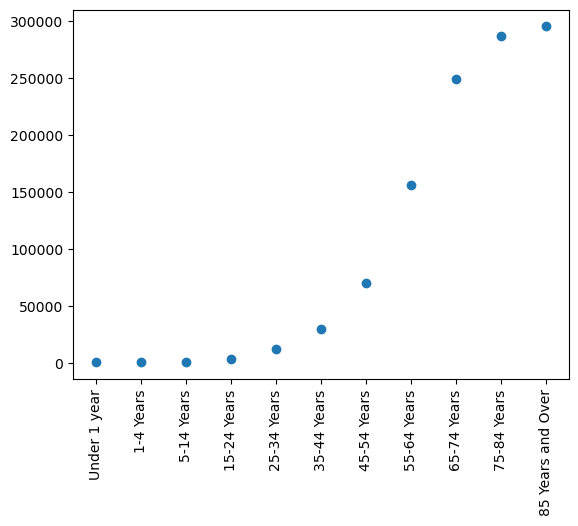

In [121]:
plt.scatter(cadt["Age Group"],cadt["COVID-19 Deaths"])
plt.xticks(cadt["Age Group"], rotation='vertical')
plt.show()

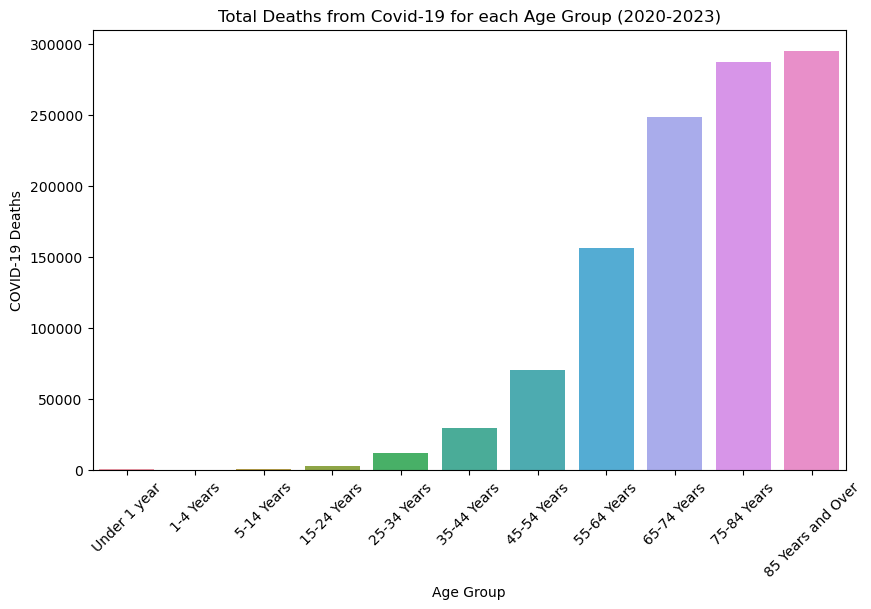

In [122]:
# Create a single dimension canvas for the plot 
fig, ax = plt.subplots(figsize= (10,6),layout='constrained')
# Use seaborn library to plot 
sns.barplot(x = 'Age Group', y ='COVID-19 Deaths', data = cadt)
# Foramting both axes
ax.set_xticklabels(["Under 1 year", "1-4 Years", "5-14 Years", "15-24 Years", "25-34 Years", "35-44 Years", "45-54 Years", "55-64 Years",
                    "65-74 Years", "75-84 Years", "85 Years and Over"], rotation=45)

ax.set_title('Total Deaths from Covid-19 for each Age Group (2020-2023)')
plt.savefig("output_data/Fig1.png")
plt.tight_layout()

### Chi-Squared Test

In [123]:
avg_covid_deaths= cadt["COVID-19 Deaths"].mean()

print(f"Average Covid-19 Deaths {avg_covid_deaths:.2f}")

cadt_2= cadt.copy()

cadt_2["Expected"]= (avg_covid_deaths)

cadt_2

Average Covid-19 Deaths 100176.55


,Age Group,COVID-19 Deaths,Expected
0,Under 1 year,418,100176.545455
1,1-4 Years,232,100176.545455
2,5-14 Years,447,100176.545455
3,15-24 Years,2916,100176.545455
4,25-34 Years,12040,100176.545455
5,35-44 Years,29418,100176.545455
6,45-54 Years,70064,100176.545455
7,55-64 Years,156038,100176.545455
8,65-74 Years,248631,100176.545455
9,75-84 Years,286728,100176.545455


In [124]:
critical_value = stats.chi2.ppf(q = 0.95, df = 10)
critical_value

18.307038053275146

In [125]:
stats.chisquare(cadt_2['COVID-19 Deaths'], cadt_2['Expected']) 

Power_divergenceResult(statistic=1506825.8741186014, pvalue=0.0)

## Data 2

In [126]:
covid_data_2 = pd.read_excel("covid_data_2.xlsx")

covid_data_2

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,COVID-19 Deaths,Age Group,Number of Mentions
0,2023-01-29,2020-01-01,2023-01-28,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,1492,0-24,1562.0
1,2023-01-29,2020-01-01,2023-01-28,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,5700,25-34,5916.0
2,2023-01-29,2020-01-01,2023-01-28,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,14878,35-44,15491.0
3,2023-01-29,2020-01-01,2023-01-28,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,36982,45-54,38430.0
4,2023-01-29,2020-01-01,2023-01-28,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,81436,55-64,84400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
521635,2023-01-29,2023-01-01,2023-01-28,By Month,2023.0,1.0,Puerto Rico,COVID-19,COVID-19,16,65-74,16.0
521636,2023-01-29,2023-01-01,2023-01-28,By Month,2023.0,1.0,Puerto Rico,COVID-19,COVID-19,16,75-84,16.0
521637,2023-01-29,2023-01-01,2023-01-28,By Month,2023.0,1.0,Puerto Rico,COVID-19,COVID-19,40,85+,40.0
521638,2023-01-29,2023-01-01,2023-01-28,By Month,2023.0,1.0,Puerto Rico,COVID-19,COVID-19,0,Not stated,0.0


In [127]:
covid_data_2= covid_data_2[(covid_data_2["State"]=="United States") & (covid_data_2["Age Group"]=="All Ages") & 
                           (covid_data_2["Group"]=="By Total")][["Condition Group", "Condition", "COVID-19 Deaths"]]

covid_data_2 = covid_data_2.reset_index(drop=True)

covid_data_2


,Condition Group,Condition,COVID-19 Deaths
0,Respiratory diseases,Influenza and pneumonia,516441
1,Respiratory diseases,Chronic lower respiratory diseases,103036
2,Respiratory diseases,Adult respiratory distress syndrome,105205
3,Respiratory diseases,Respiratory failure,421956
4,Respiratory diseases,Respiratory arrest,22514
5,Respiratory diseases,Other diseases of the respiratory system,58327
6,Circulatory diseases,Hypertensive diseases,203885
7,Circulatory diseases,Ischemic heart disease,121223
8,Circulatory diseases,Cardiac arrest,130369
9,Circulatory diseases,Cardiac arrhythmia,87857


In [131]:
clean_covid_data_2 = covid_data_2.drop([20,21,22])

clean_covid_data_2= clean_covid_data_2.sort_values("COVID-19 Deaths", ascending=False)

clean_covid_data_2= clean_covid_data_2.reset_index(drop=True)

clean_covid_data_2.to_csv("output_data/conditions_data.csv")

clean_covid_data_2

,Condition Group,Condition,COVID-19 Deaths
0,Respiratory diseases,Influenza and pneumonia,516441
1,Respiratory diseases,Respiratory failure,421956
2,Circulatory diseases,Hypertensive diseases,203885
3,Diabetes,Diabetes,163021
4,Circulatory diseases,Cardiac arrest,130369
5,Renal failure,Renal failure,124215
6,Circulatory diseases,Ischemic heart disease,121223
7,Sepsis,Sepsis,113575
8,Respiratory diseases,Adult respiratory distress syndrome,105205
9,Respiratory diseases,Chronic lower respiratory diseases,103036


In [129]:
cols= clean_covid_data_2["Condition"].to_list()

cols

['Influenza and pneumonia',
 'Respiratory failure',
 'Hypertensive diseases',
 'Diabetes',
 'Cardiac arrest',
 'Renal failure',
 'Ischemic heart disease',
 'Sepsis',
 'Adult respiratory distress syndrome',
 'Chronic lower respiratory diseases',
 'Heart failure',
 'Vascular and unspecified dementia',
 'Cardiac arrhythmia',
 'Other diseases of the circulatory system',
 'Malignant neoplasms',
 'Other diseases of the respiratory system',
 'Cerebrovascular diseases',
 'Obesity',
 'Alzheimer disease',
 'Respiratory arrest']

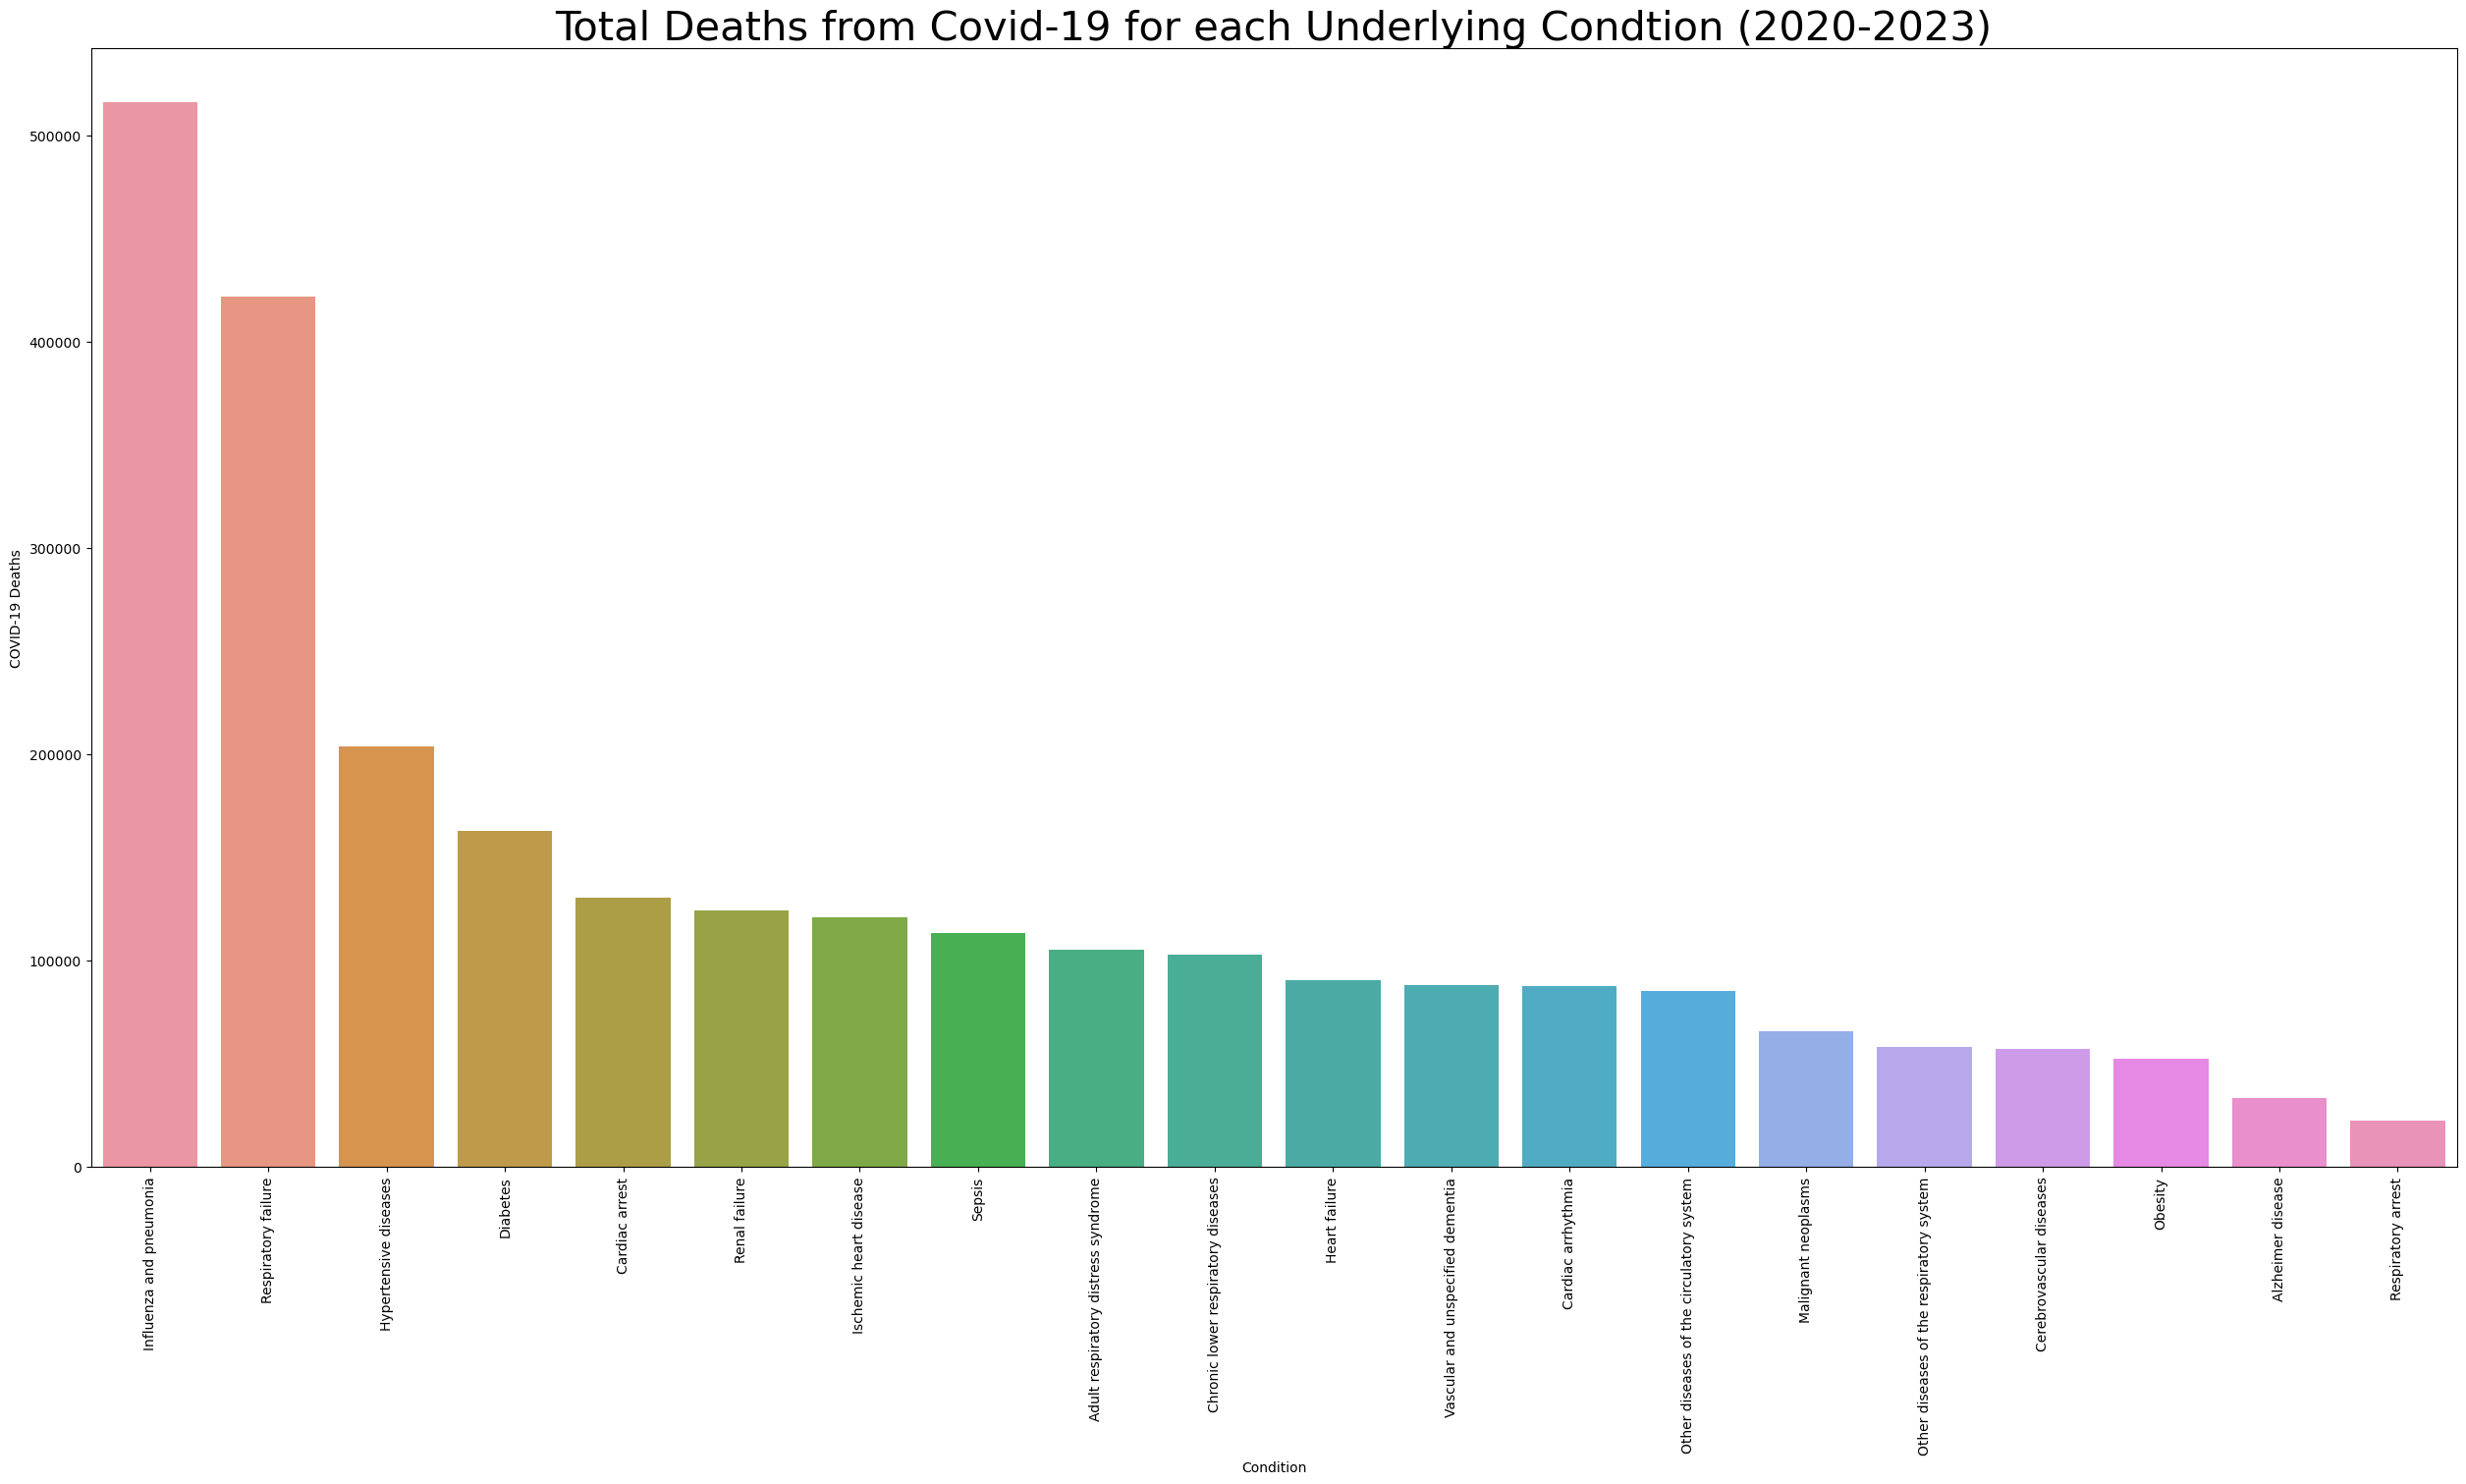

In [130]:
# Create a single dimension canvas for the plot 
fig, ax = plt.subplots(figsize= (25,15),layout='constrained')
# Use seaborn library to plot 
sns.barplot(x = 'Condition', y ='COVID-19 Deaths', data = clean_covid_data_2)
# Foramting both axes
ax.set_xticklabels(cols, rotation=90)
ax.set_title('Total Deaths from Covid-19 for each Underlying Condtion (2020-2023)', fontsize= 30)
plt.savefig("./output_data/Fig2.png")
